In [3]:
!pip install scikit-learn==1.1.3 logitboost==0.7

In [4]:
!pip install scikit-learn==1.1.3 imbalanced-learn==0.9.1

In [26]:
#TODO:LOGITBOOST ALGORITHM IMPLEMENTATION ON ONLINE GAMING BEHAVIOR
#TODO: READ A CSV FILE
#TODO:DROP INAPPROPRIATE COLUMNS AND DROP NULL VALUES
#TODO:CORRELATION MATRIX
#CHECK VALUES OF MODEL USING TRAIN AND TEST
#TODO:PLOT GRAPHS TO DATA VISUALIZATION
#TODO:MUHAMMAD AHMED NAEEM
#TODO:L1F23BSAI027
#TODO:AI ALGORITHM


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
)
from imblearn.over_sampling import SMOTE
from logitboost import LogitBoost

In [27]:
# Load dataset
df = pd.read_csv("online_gaming_behavior_dataset.csv")

In [28]:
# Drop inappropriate column
df = df.drop(columns=['PlayerID'])

In [29]:
# Drop duplicate rows
print("NUMBER OF DUPLICATE ROWS:", df.duplicated().sum())
df = df.drop_duplicates()

NUMBER OF DUPLICATE ROWS: 0


In [30]:
# Handle missing values
print("MISSING VALUES PER COLUMN:", df.isnull().sum())
df = df.dropna()

MISSING VALUES PER COLUMN: Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [31]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [32]:
df.tail()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [34]:
df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [35]:
df.shape

(40034, 12)

In [36]:
# Encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['GameGenre'] = le.fit_transform(df['GameGenre'])
df['GameDifficulty'] = le.fit_transform(df['GameDifficulty'])
df['EngagementLevel'] = le.fit_transform(df['EngagementLevel'])

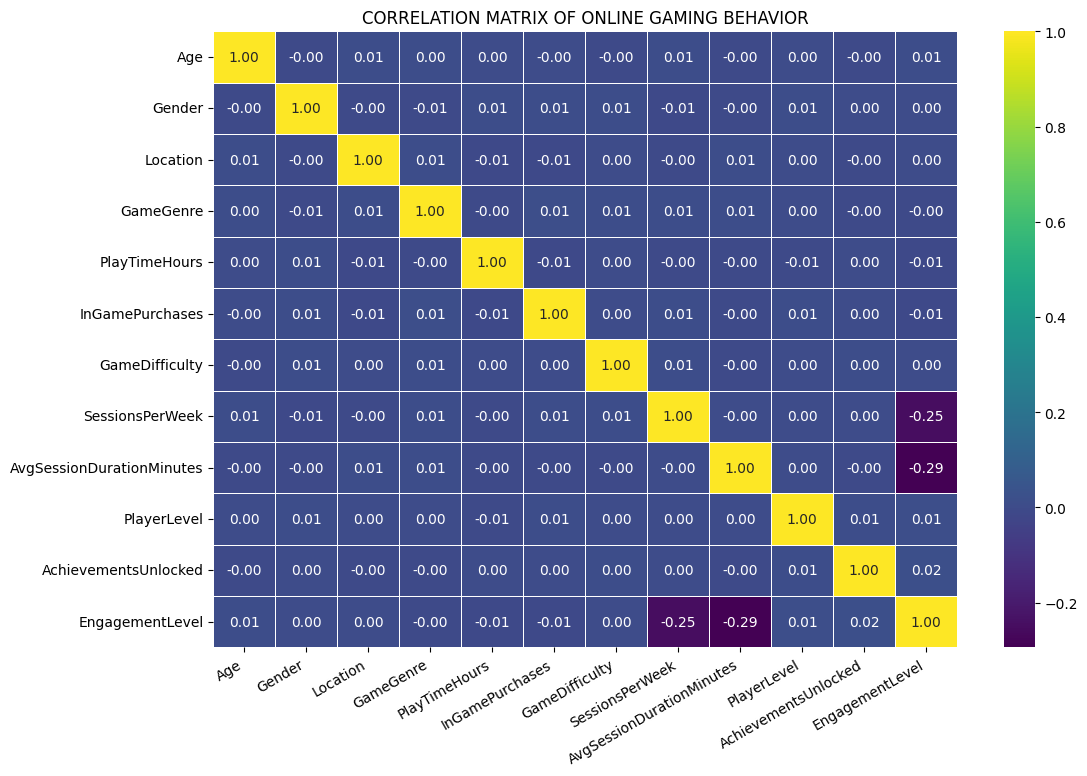

In [37]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('CORRELATION MATRIX OF ONLINE GAMING BEHAVIOR')
plt.xticks(rotation=30, ha='right')
plt.show()

In [38]:
# Prepare features and target
X = df.drop(columns=['EngagementLevel']).to_numpy()  # Convert to NumPy array
y = df['EngagementLevel'].to_numpy()  # Convert to NumPy array


In [39]:

# Use SMOTE for balancing the dataset
smote = SMOTE(random_state=101)
X, y = smote.fit_resample(X, y)

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


In [41]:
# Initialize and train LogitBoost
logitboost = LogitBoost(n_estimators=50, learning_rate=1.0, random_state=101)
logitboost.fit(X_train, y_train)

LogitBoost(random_state=101)

In [42]:

# Predictions
y_pred = logitboost.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"ACCURACY: {accuracy}")
print(f"PRECISION: {precision}")
print(f"RECALL: {recall}")
print(f"F1 SCORE: {f1}")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_pred)}")


ACCURACY: 0.9058064516129032
PRECISION: 0.9068326305020689
RECALL: 0.9058064516129032
F1 SCORE: 0.9060272195170667
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3898
           1       0.92      0.90      0.91      3883
           2       0.87      0.91      0.89      3844

    accuracy                           0.91     11625
   macro avg       0.91      0.91      0.91     11625
weighted avg       0.91      0.91      0.91     11625



In [43]:
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output_df.head())

   Actual  Predicted
0       2          2
1       0          0
2       1          1
3       1          1
4       1          1


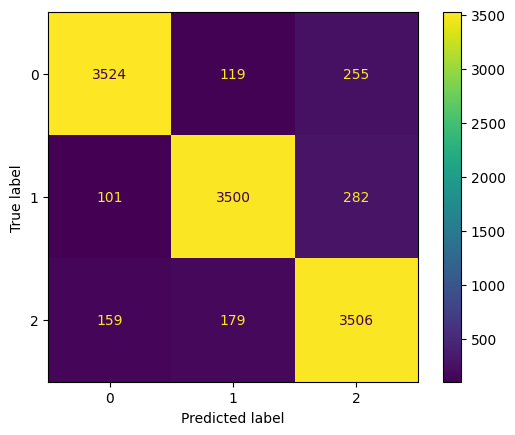

In [44]:
# Confusion matrix display
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


<ipython-input-45-18cc5ee5020a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


Text(0, 0.5, 'Count')

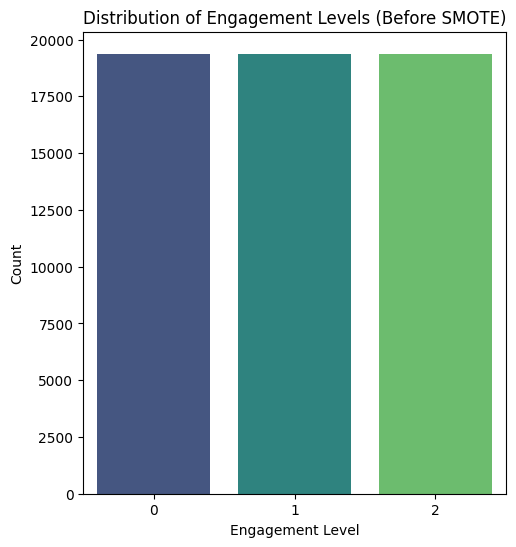

In [45]:
# 2. Distribution of Engagement Levels (Before and After SMOTE)
plt.figure(figsize=(12, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Engagement Levels (Before SMOTE)')
plt.xlabel('Engagement Level')
plt.ylabel('Count')

<ipython-input-46-252a16977c69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='viridis')


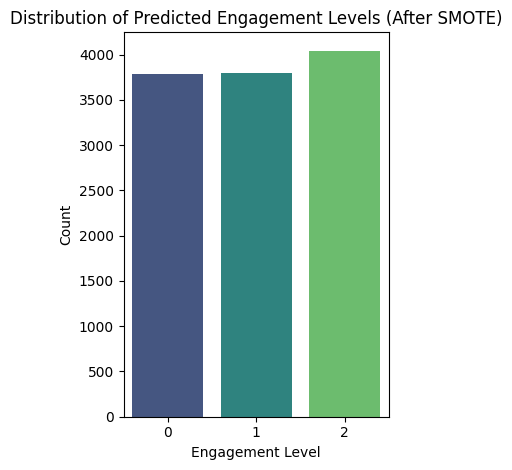

In [46]:
# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, palette='viridis')
plt.title('Distribution of Predicted Engagement Levels (After SMOTE)')
plt.xlabel('Engagement Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

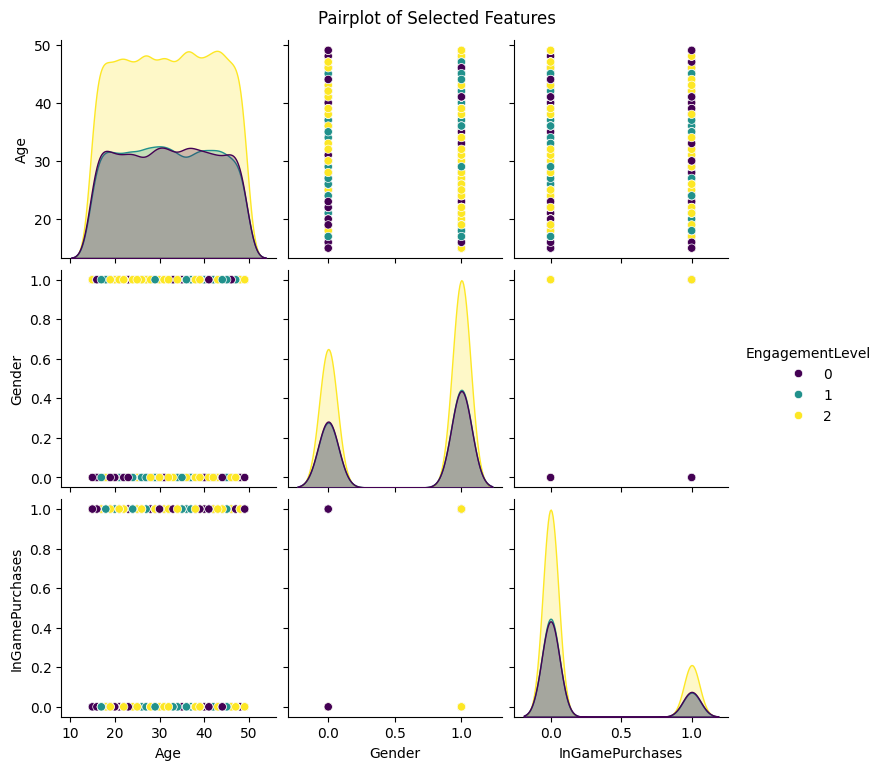

In [47]:
# 4. Pairplot of Selected Features
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Age', 'Gender', 'InGamePurchases', 'EngagementLevel']], hue='EngagementLevel', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

<ipython-input-48-267af488d57d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='Age', data=df, palette='viridis')


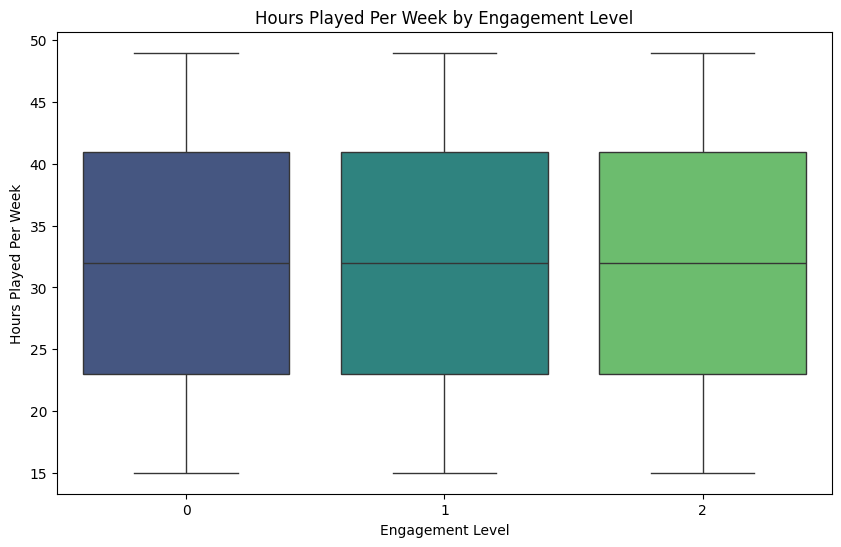

In [48]:
# 5. Boxplot of Hours Played Per Week by Engagement Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='EngagementLevel', y='Age', data=df, palette='viridis')
plt.title('Hours Played Per Week by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Hours Played Per Week')
plt.show()


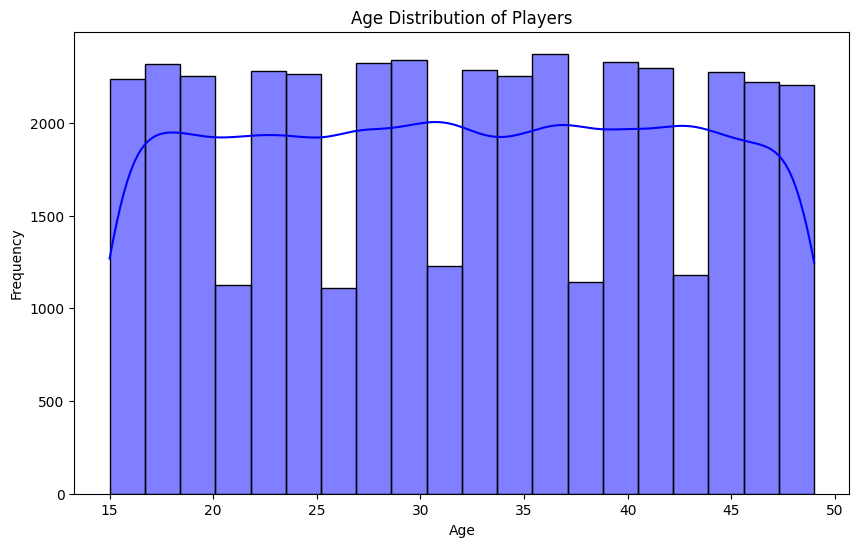

In [49]:
# 6. Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-50-e2ef5134110a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EngagementLevel', y='InGamePurchases', data=df, palette='viridis')


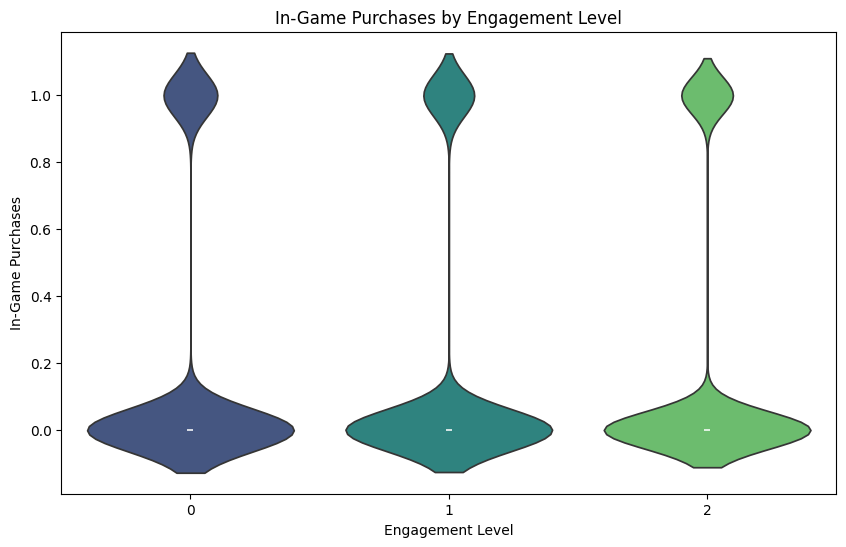

In [50]:
# 9. Violin Plot of In-Game Purchases by Engagement Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='EngagementLevel', y='InGamePurchases', data=df, palette='viridis')
plt.title('In-Game Purchases by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('In-Game Purchases')
plt.show()

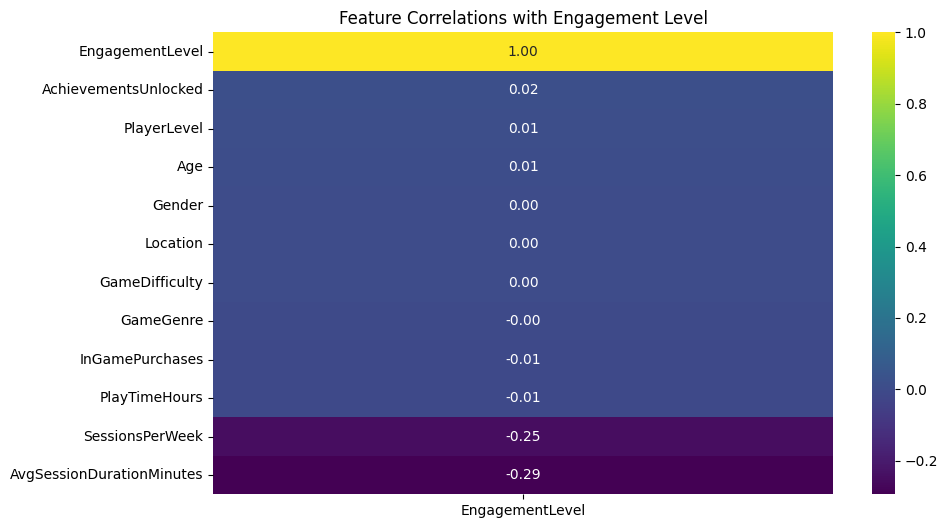

In [51]:
# 10. Heatmap of Feature Correlations with Engagement Level
plt.figure(figsize=(10, 6))
engagement_corr = df.corr()[['EngagementLevel']].sort_values(by='EngagementLevel', ascending=False)
sns.heatmap(engagement_corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Feature Correlations with Engagement Level')
plt.show()

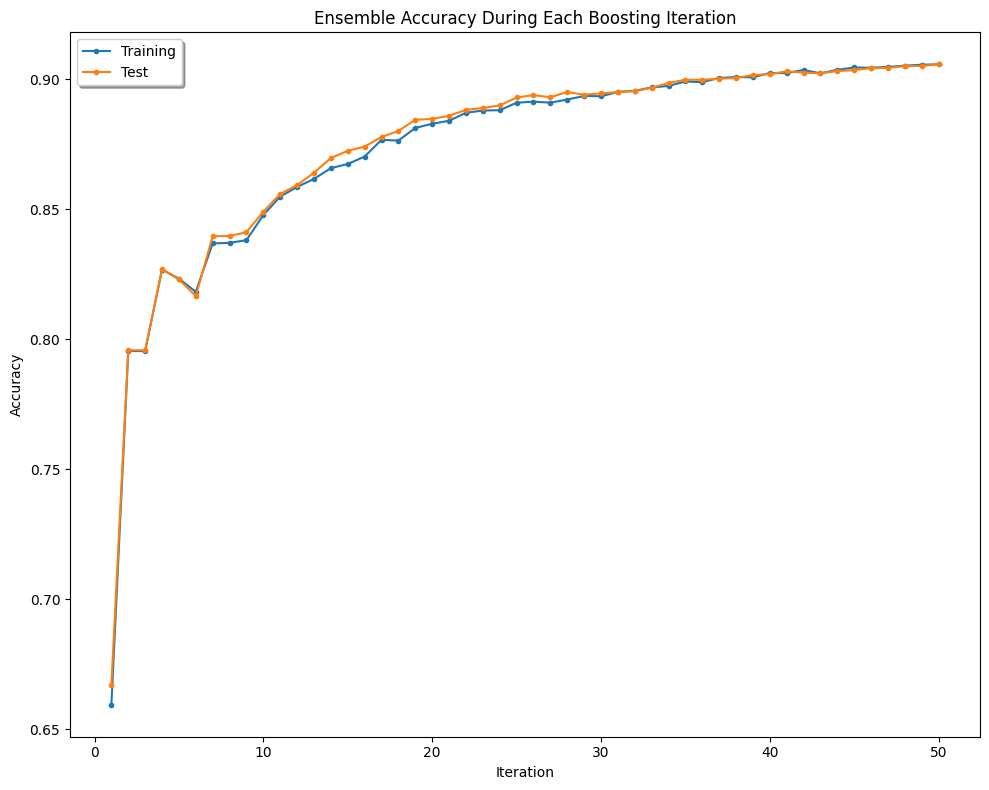

In [52]:
# Get staged accuracy for training and test sets
iterations = np.arange(1, logitboost.n_estimators + 1)
staged_accuracy_train = list(logitboost.staged_score(X_train, y_train))
staged_accuracy_test = list(logitboost.staged_score(X_test, y_test))

# Plot the accuracy over boosting iterations
plt.figure(figsize=(10, 8))
plt.plot(iterations, staged_accuracy_train, label='Training', marker='.')
plt.plot(iterations, staged_accuracy_test, label='Test', marker='.')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Ensemble Accuracy During Each Boosting Iteration')
plt.legend(loc='best', shadow=True, frameon=True)

plt.tight_layout()
plt.show()

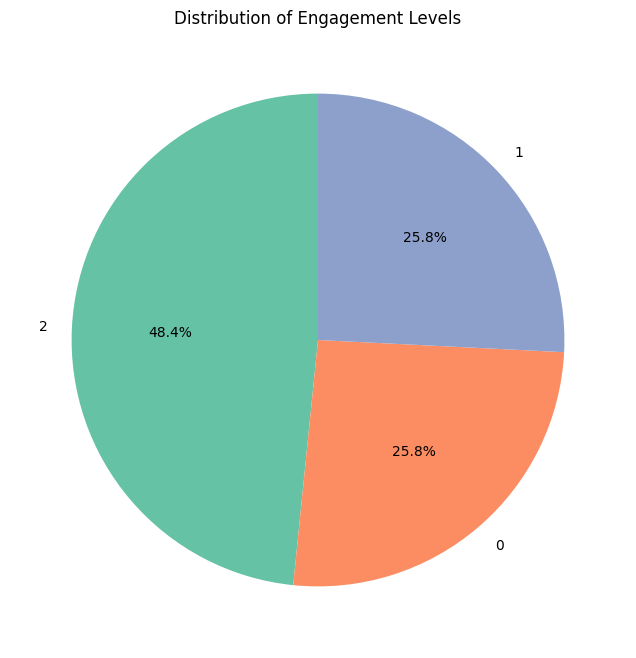

In [58]:
# 11. Pie Chart of Engagement Level Distribution
plt.figure(figsize=(8, 8))
engagement_counts = df['EngagementLevel'].value_counts()
plt.pie(engagement_counts, labels=engagement_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Distribution of Engagement Levels')
plt.show()